In [3]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split, KFold
from sklearn.grid_search import GridSearchCV
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble
from sklearn.ensemble import AdaBoostClassifier
import warnings
from itable import PrettyTable, TableStyle, CellStyle
import pandas as pd
warnings.filterwarnings("ignore")
%pylab inline
pylab.rcParams["figure.figsize"] = (12, 6)
plt.style.use("fivethirtyeight")

Populating the interactive namespace from numpy and matplotlib


In [4]:
# generate dataset

X, y = make_classification(
    class_sep=1.2,
    weights=[0.1, 0.9], 
    n_informative=3,
    n_redundant=1, 
    n_features=5, 
    n_clusters_per_class=1,
    n_samples=10000, 
    flip_y=0, 
    random_state=10
)

In [5]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

y = y.astype('str')
y[y=='1'] = 'L'
y[y=='0'] = 'S'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=0
)

X_1, X_2 = X_train[y_train=='S'], X_train[y_train=='L']

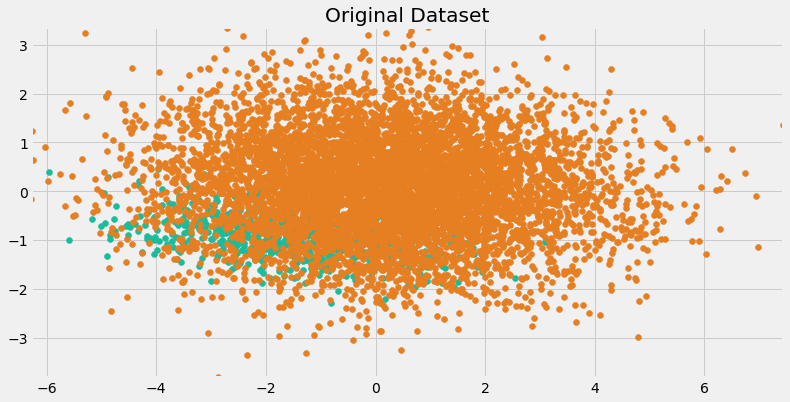

In [6]:
plt.scatter(list(zip(*X_1))[0], list(zip(*X_1))[1], color = '#1abc9c')
plt.scatter(list(zip(*X_2))[0], list(zip(*X_2))[1], color = '#e67e22')

x_coords = list(zip(*X_1))[0]+ list(zip(*X_2))[0]
y_coords = list(zip(*X_1))[1]+ list(zip(*X_2))[1]
plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

plt.title("Original Dataset")
plt.show()

In [7]:
# Logistic Regression

clf_base = LogisticRegression()
grid = {
# regularization parameter over a few set of values
    'C': 10.0**np.arange(-2,3),
# IDK
    'penalty': ['l1', 'l2']
       }

cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv=cv, n_jobs=8, scoring='f1_macro')

clf.fit(X_train, y_train)

coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_

x1 = np.linspace(-8, 10, 100)
x2 = -(coef[0][0] * x1 + intercept[0])/ coef[0][1]

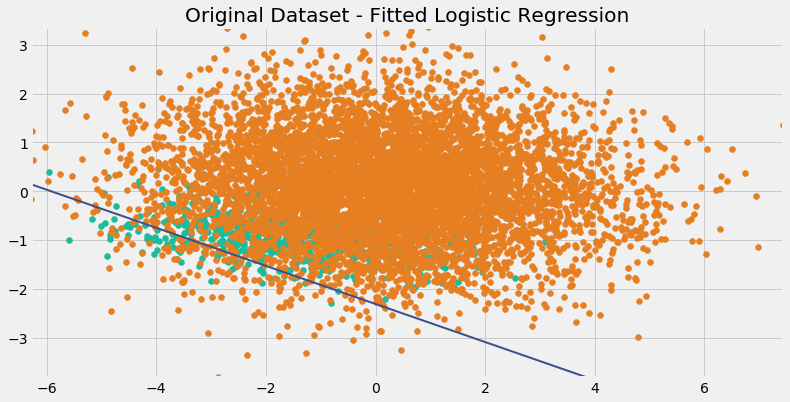

In [8]:
plt.scatter(list(zip(*X_1))[0], list(zip(*X_1))[1], color = '#1abc9c')
plt.scatter(list(zip(*X_2))[0], list(zip(*X_2))[1], color = '#e67e22')

x_coords = list(zip(*X_1))[0]+ list(zip(*X_2))[0]
y_coords = list(zip(*X_1))[1]+ list(zip(*X_2))[1]
plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

plt.title("Original Dataset - Fitted Logistic Regression")
plt.plot(x1, x2, color="#414e8a", linewidth=2)
plt.show()

In [9]:
print classification_report(y_test, clf.predict(X_test))

             precision    recall  f1-score   support

          L       0.90      0.98      0.94      2680
          S       0.39      0.12      0.19       320

avg / total       0.85      0.89      0.86      3000



In [ ]:
# Assymestric Loss Function

In [10]:
# Logistic Regression with balanced class weights
clf_base = LogisticRegression()
grid = {
    'C': 10.0**np.arange(-2,3),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced']
       }

cv = KFold(X_train.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv=cv, n_jobs=8, scoring='f1_macro')

clf.fit(X_train, y_train)

coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_

x1 = np.linspace(-8, 10, 100)
x2 = -(coef[0][0] * x1 + intercept[0])/ coef[0][1]

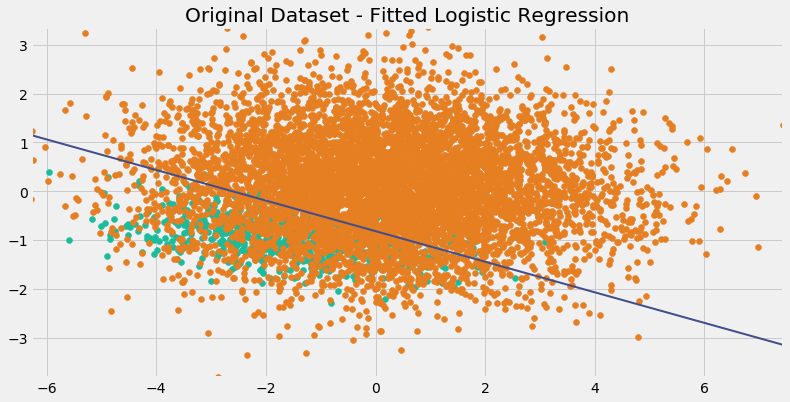

In [11]:
plt.scatter(list(zip(*X_1))[0], list(zip(*X_1))[1], color = '#1abc9c')
plt.scatter(list(zip(*X_2))[0], list(zip(*X_2))[1], color = '#e67e22')

x_coords = list(zip(*X_1))[0]+ list(zip(*X_2))[0]
y_coords = list(zip(*X_1))[1]+ list(zip(*X_2))[1]
plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

plt.title("Original Dataset - Fitted Logistic Regression")
plt.plot(x1, x2, color="#414e8a", linewidth=2)
plt.show()

In [12]:
print classification_report(y_test, clf.predict(X_test))

             precision    recall  f1-score   support

          L       0.98      0.79      0.88      2680
          S       0.34      0.89      0.49       320

avg / total       0.92      0.80      0.84      3000



In [ ]:
# UNDERSAMPLING THE MAJORITY CLASS

In [ ]:
# RANDOM UNDERSAMPLING

In [14]:
# Random undersampling of majority class

us  = RandomUnderSampler(ratio=0.5, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print "Distribution of class labels before resampling {}".format(Counter(y_train))
print "Distribution of class labels after resampling {}".format(Counter(y_train_res))

clf_base = LogisticRegression()
grid = {
    'C': 10.0 ** np.arange(-2,3),
    'penalty': ['l1', 'l2']
}

cv = KFold(X_train_res.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv=cv, n_jobs=8, scoring='f1_macro')

clf.fit(X_train_res, y_train_res)

coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_

x1 = np.linspace(-8, 10, 100)
x2 = -(coef[0][0] * x1 + intercept[0]) / coef[0][1]

X_1_res = X_train_res[y_train_res=="S"]
X_2_res = X_train_res[y_train_res=="L"]

Distribution of class labels before resampling Counter({'L': 6320, 'S': 680})
Distribution of class labels after resampling Counter({'L': 1360, 'S': 680})


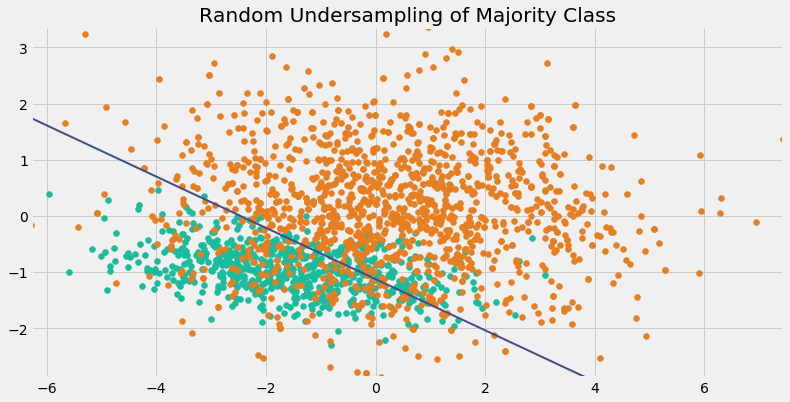

In [20]:
plt.scatter(zip(*X_1_res)[0], zip(*X_1_res)[1], color="#1abc9c")
plt.scatter(zip(*X_2_res)[0], zip(*X_2_res)[1], color="#e67e22")

x_coords = zip(*X_1_res)[0] + zip(*X_2_res)[0]
y_coords = zip(*X_1_res)[1] + zip(*X_2_res)[1]
plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

plt.title("Random Undersampling of Majority Class")
plt.plot(x1, x2, color="#414e8a", linewidth=2)
plt.show()

In [21]:
print classification_report(y_test, clf.predict(X_test))

             precision    recall  f1-score   support

          L       0.97      0.83      0.90      2680
          S       0.36      0.82      0.50       320

avg / total       0.91      0.83      0.85      3000



In [22]:
precision_recall_comparison

NameError: name 'precision_recall_comparison' is not defined

In [30]:
# Near Miss 1
us = NearMiss(ratio=0.5, size_ngh=3, version=1, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print "Distribution of class labels before resampling {}".format(Counter(y_train))
print "Distribution of class labels after resmapling {}".format(Counter(y_train_res))

clf_base = LogisticRegression()
grid = {"C": 10.0 ** np.arange(-2,3),
        "penalty": ["l1", "l2"]
       }

cv = KFold(X_train_res.shape[0], n_folds=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv=cv, n_jobs=8, scoring="f1_macro")

clf.fit(X_train_res, y_train_res)

coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_

x1 = np.linspace(-8, 10, 100)
x2 = -(coef[0][0] *x1 + intercept[0]) / coef[0][1]

X_1_res = X_train_res[y_train_res=="S"]
X_2_res = X_train_res[y_train_res=="L"]

Distribution of class labels before resampling Counter({'L': 6320, 'S': 680})
Distribution of class labels after resmapling Counter({'L': 1360, 'S': 680})


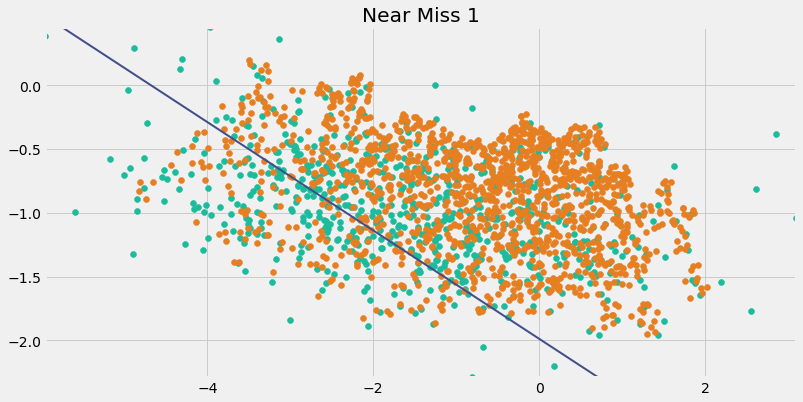

In [31]:
plt.scatter(zip(*X_1_res)[0], zip(*X_1_res)[1], color="#1abc9c")
plt.scatter(zip(*X_2_res)[0], zip(*X_2_res)[1], color="#e67e22")

x_coords = zip(*X_1_res)[0] + zip(*X_2_res)[0]
y_coords = zip(*X_1_res)[1] + zip(*X_2_res)[1]
plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

plt.title("Near Miss 1")
plt.plot(x1, x2, color="#414e8a", linewidth=2)
plt.show()